In [63]:
import pandas as pd
import numpy as np

In [64]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")
#df stands for "data frame"

In [65]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
# 랜덤 시드 설정 - 난수 생성을 위한 값 고정
import random
np.random.seed(1234)
random.seed(1234)

## EDA - Exploratory Data Analysis

In [69]:
# 데이터 행, 열 개수 확인
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [70]:
# 처음 행 표시
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
# 표시할 수 있는 행과 열 개수 변경
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [73]:
# 데이터 내 각 열 값의 속성 확인
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 데이터 분류
데이터 -> 1. object형(문자열) 2. 수치데이터 3. ...

수치 데이터 -> 1. 질적 변수 2. 양적 변수
1. 질적 변수: 분류를 위한 수치로 수치 사이의 간격에 큰 의미가 없는 경우 ex. 티켓 등급
    질적 변수 -> 1. 명목 척도 2. 순서 척도
    1-1. 명목 척도: 단지 분류를 위한 것 ex. 방 번호, 티켓 번호
    1-2. 순서 척도: 질적 변수 중에서도 특히 순서에 의미가 있는 것 ex. 티켓 등급
  
2. 양적 변수: 간격에 의미가 있는 수치 ex. 나이, 티켓 요금
	양적 변수 -> 1. 간격 척도 1-1. 비례 척도
    2-1. 간격 척도: 같은 간격의 눈금으로 측정하는 것 ex. 온도
		2-1-1. 비례 척도: 간격척도의 조건을 만족시키는 것 중 원점이 있어서 데이터 비율에 의미를 갖게 되는 것 ex. 티켓 요금
        				3달러짜리 티겟은 1달러짜리보다 3배 비싸다고 할 수 있기 때문


In [74]:
# 수치 데이터 개요 파악 - describe 함수 사용하면 수치 데이터가 아닌 데이터는 자동적으로 제외됨
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [76]:
# 카테고리 변수 확인(지정된 series에 포함된 값들과 중복 횟수) - "Sex", "Embarked", "Cabin" series
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [77]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [78]:
train_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [79]:
# 결측치 확인(결측치: 아무 값도 들어 있지 않은 것, null)
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
# 각 행의 값 합치기
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

따라서 Age, Cabin 속성에 결측치가 많음을 확인할 수 있음

## 데이터의 시각화

In [82]:
# 시각화용 라이브러리 import
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# 첫 줄은 주피터 노트북 안에서 그래프를 표시하려고 넣는 것
# matplotlib: 그래프용 라이브러리, seaborn: 좀 더 다양한 데이터 시각화를 위한 라이브러리

In [83]:
# 표시 스타일 지정
plt.style.use("ggplot")

### 목적 변수 Survived 관련 데이터 시각화 

In [84]:
# 학습 데이터에서 Embarked(승선한 항구 이름), Survived, PassengerId 추출
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [85]:
# 시각화하고 싶은 데이터에서 결측치 제외
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [86]:
# 각 행을 Embarked, Survived 로만 집계
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [87]:
# 데이터를 수평으로 변환 - 집계한 데이터 프레임을 시각화하기 쉽게
# 데이터 정렬 방법: 1. 수직 정렬 2. 수평 정렬
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()

In [88]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

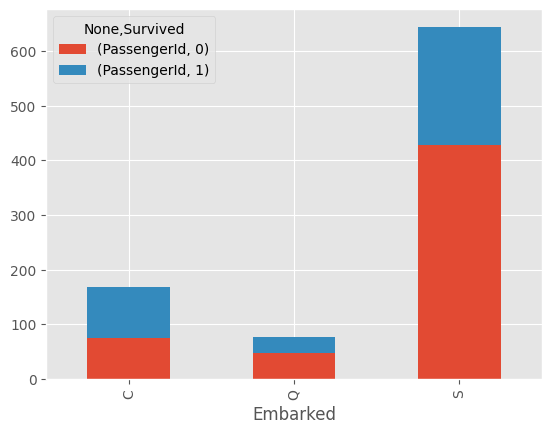

In [89]:
# 누적 막대 그래프로 시각화
embarked_df.plot.bar(stacked=True)

In [90]:
# survived_rate 변수 새로 만들기
# iloc 함수로 임의의 행과 열 추출
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [91]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<Axes: xlabel='Sex'>

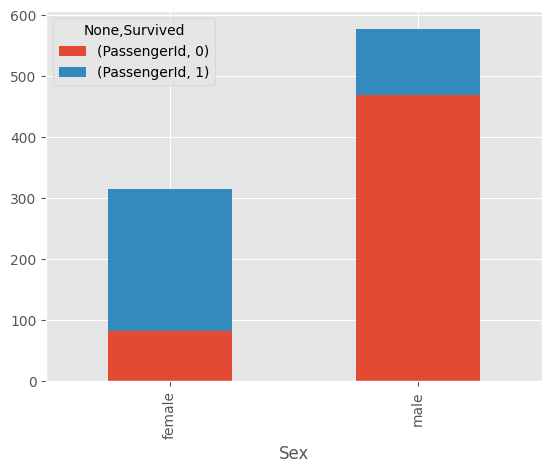

In [92]:
# 성별 시각화
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

<Axes: xlabel='Pclass'>

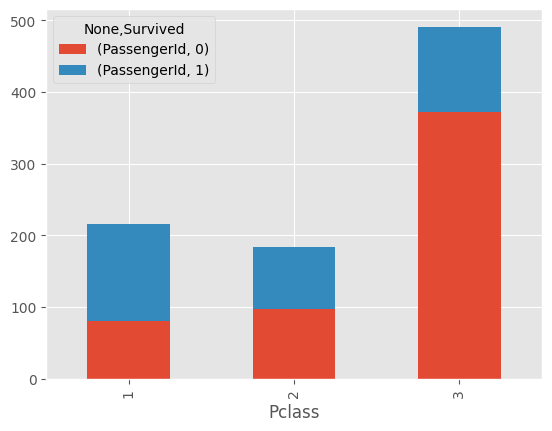

In [93]:
# 티켓 등급 시각화
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

여성이 남성보다 생존률이 높고, 티켓 등급이 높을수록 생존률이 높음. 먼저 구조되었기 때문?

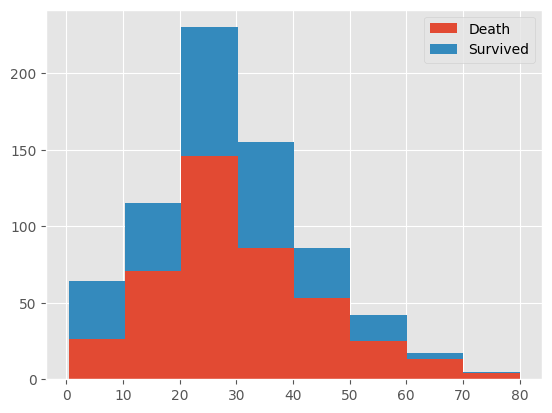

In [94]:
# 연령별 생존률 히스토그램으로 시각화: 연령은 연속 값이기 때문
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"])
plt.legend()

10세 이하 아이들이 다른 연령층에 비해 생존율이 높음

In [127]:
# 카테고리 변수를 더미 변수화하기: 각 변수와 Survived 목적 변수 간 상관성 분석

# 상관관계의 계산이나 머신러닝 등 처리는 수치 데이터에서만 실행 가능 -> 수치데이터가 아닌 데이터를 수치로 변환: one-hot encoding 사용
# one-hot encoding: 어떤 카테고리 변수에 대하여 그 값인지 여부를 1, 0으로 나타내는 방법: "더미 변수화 한다"라고 함

# Sex, Embarked 더미 변수화
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True, dtype=int)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"], dtype=int)

In [128]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [133]:
# 상관 행렬 작성

# 상관 행렬: 상관 계수를 나열하여 -1 ~ 1의 수치로 확인하는 것
# 상관 계수(Correlation Coefficient): 각 변수들의 쌍이 각각 어느 정도의 선형 관계를 가지고 있는지 측정한 것으로, -1과1 사이의 값을 갖음
# 두 변수가 함께 증가하거나 감소하면 상관 계수 값은 양수가 되고, 한쪽 변수가 감소할 때 다른 변수는 반대로 증가한다면 상관 계수는 음수가 됨

train_corr = train_df_corr.corr(numeric_only=True)

In [134]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<Axes: >

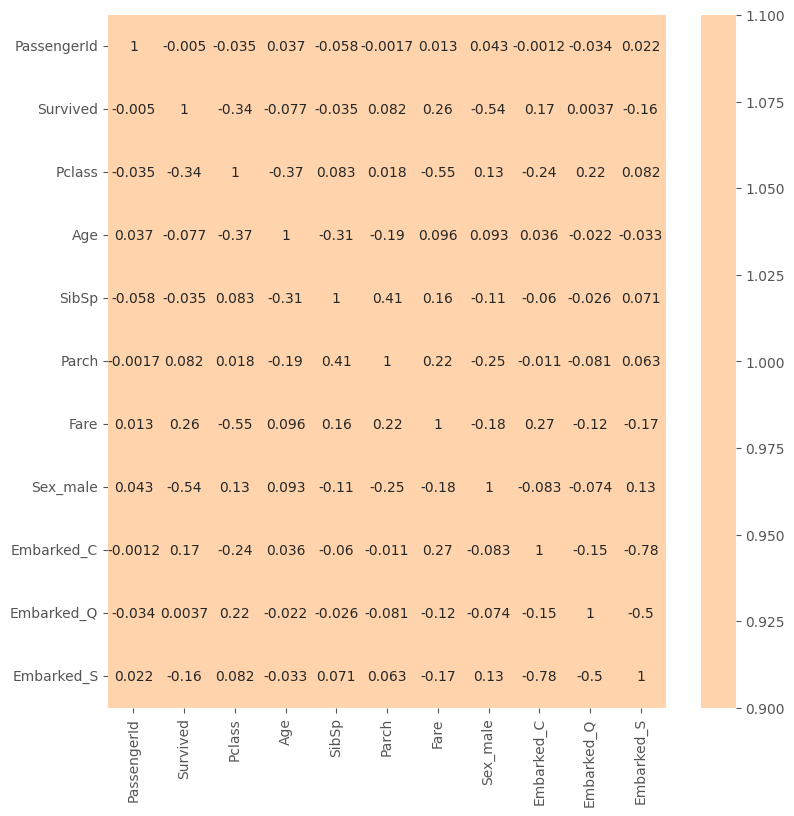

In [146]:
# 히트맵으로 시각화: seaborn 사용

plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=1, center=0, annot=True)

1. Survived 목적 변수와 가장 상관관계가 높은 것은 Sex_male 로 -0.54 -> 남성을 1로 놓았기 때문에 여성은 -1이 되므로, 상관 계수가 -0.54라는 것은 남성 생존률은 낮고 여성 생존률은 높았음을 보여줌
2. Pclass가 -0.34 -> 티켓 등급이 높은 쪽의 생존율이 높았음
3. Fare가 0.26 -> 생존 확률에 영향이 있었음
4. Age는 전체적으로 -0.077이므로 Survived와 상관없는 것 같아 보이지만 단정할 수는 없음 아직

상관계수는 어디까지나 참고만 하는 편이 좋습니다. 

## 데이터 전처리와 특징 값 생성

1. 학습 데이터와 테스트 데이터의 통합: 학습 데이터, 테스트 데이터를 모두 이용하여 전체 집계나 통계 정보를 얻기 위해서

In [178]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [179]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [180]:
# 전체 데이터로 결측치 수 확인
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [181]:
# 결측치 메우기 - Fare
# Pclass 별 Fare의 평균을 구한 후 Pclass의 평균값으로 해당 결측치를 채우는 방법

# 평균값 계산
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

In [182]:
# 열 이름 바꾸기
Fare_mean.columns = ["Pclass", "Fare_mean"]

In [183]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [184]:
# 결측치 채워 넣기

#1. Fare_mean 을 all_df 와 Pclass 을 기준으로 병합
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
#2. Fare의 결측치를 isnull()로 판정 -> 만약 null 이라면 Fare 를 Fare_mean 값으로 바꿈
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
#all_df["Fare"].null(): 행 지정, "Fare"는 열 지정
all_df = all_df.drop("Fare_mean", axis=1)
#3. 이제 불필요하니까 열 삭제

In [185]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [186]:
# Name 호칭에 주목
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

호칭: Master, Mr, Miss, Mrs, ... : 연령, 성별과 관계 있음

In [200]:
# 호칭을 변수로 추가하기
name_df = all_df["Name"].str.split(pat="[,.]", n=2, expand=True)

In [201]:
name_df.columns = ["family_name", "honorific", "name"]

In [202]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [203]:
# name_df 각 행의 선두와 말미 공백 문자 삭제하기
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [204]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [205]:
# 호칭마다 인원수 세기
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [207]:
# 호칭별 연령 분포 확인

# all_df와 name_df 결합 (axix=1로 해서 가로로 결합)
all_df = pd.concat([all_df, name_df], axis=1)

In [208]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

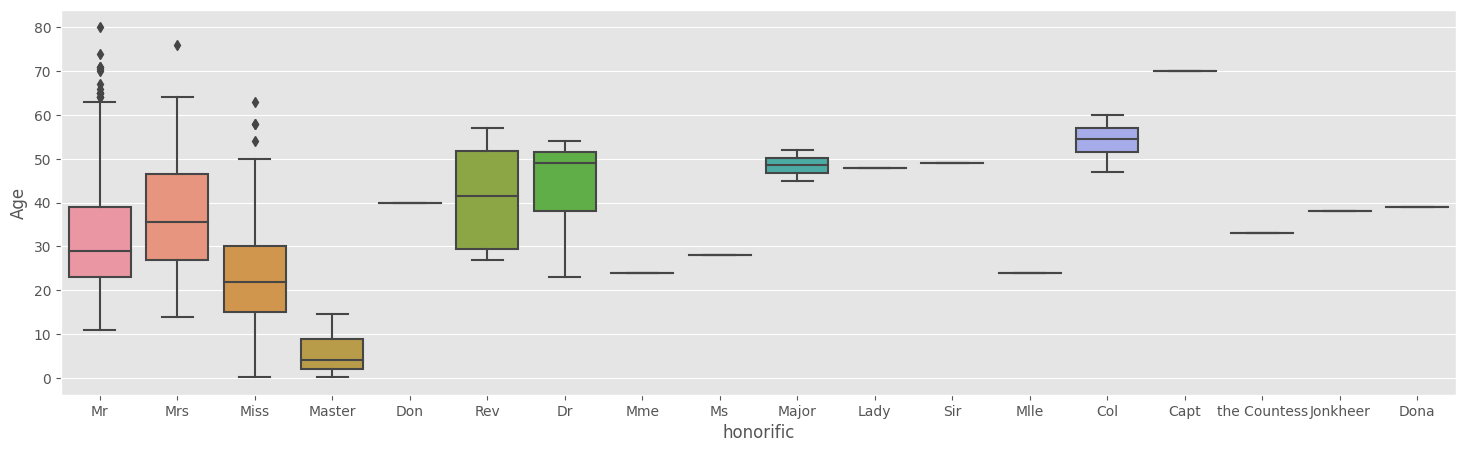

In [209]:
# boxplot 사용해서 호칭별 연령 분포 확인
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [211]:
# 호칭별 연령 평균값 확인
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [212]:
# 호칭별 생존율 차이 확인

# 원래 데이터 프레임에 name_df 결합
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)], axis=1)

<Axes: xlabel='honorific'>

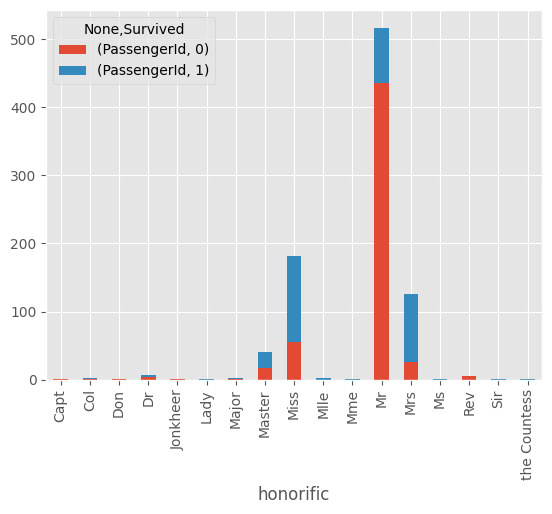

In [215]:
# train_df에서 honorific, Survived, PassengerId를 빼낸 후 결측치를 포함한 행을 삭제
# honirific, Survived 별로 인원수 집계

honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

1. 여성에게 사용되는 Miss, Mrs: 생존율 높음
2. 남성에게 사용되는 Mr: 사망률 높음
3. 남성중에서도 젊은 남성에게 사용되는 Master는 Mr와 비교할 떄 생존율이 높음

연령은 결측치가 많은 데이터이기 때문에 여기서 구한 호칭 데이터가 연령을 보완하는 효과적인 변수가 될 가능성이 있음

In [217]:
# 연령의 결측치를 호칭별 평균 연령으로 보완

honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]

all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis=1)

In [218]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [219]:
# 가족 인원수 추가하기

# Parch: 승선 중인 부모나 자녀의 수
# SibSp: 승선 중인 형제나 배우자의 수

# 두 변수를 더해서 family_num 변수를 만들기
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [220]:
# 홀로 승선했는지 여부를 새로운 변수로 추가하기: "alone"

all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"].fillna(0, inplace=True)

In [221]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,0,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,0,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,0,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,0,1.0


In [222]:
# 불필요한 변수 삭제

all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)

In [223]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.000000,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.000000,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.000000,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.000000,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.000000,0,0,8.0500,S,Mr,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0
1305,NaN,1,female,39.000000,0,0,108.9000,C,Dona,0,1.0
1306,NaN,3,male,38.500000,0,0,7.2500,S,Mr,0,1.0
1307,NaN,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0


In [224]:
# 카테고리 변수를 수치로 변환

categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [225]:
# Mr, Miss, Mrs, Master 이외에는 other로 통합

all_df.loc[~((all_df["honorific"]=="Mr") | (all_df["honorific"]=="Miss") | (all_df["honorific"]=="Mrs") | (all_df["honorific"]=="Master")), "honorific"] = "other"

In [226]:
all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

### 라벨 인코딩

In [227]:
from sklearn.preprocessing import LabelEncoder

In [228]:
# LabelEncoder()는 결측치가 있으면 작동하지 않기 때문에 Embarked에 포함된 결측치는 missing 등 임의의 문자열로 미리 치환함

all_df["Embarked"].fillna("missing", inplace=True)

In [229]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [230]:
# LabelEncoder()로 초기화한 후 해당 판다스의 열을 학습(fit)시켜 카테고리별 라벨을 생성함
# 그 후 transform 함수로 원래 열에 다시 적용하면 라벨 인코딩이 됨

le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [232]:
# 나머지 열도 라벨 인코딩 - Embarked를 포함하여 categories 내의 모든 열을 라벨 인코딩

for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [233]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.000000,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.000000,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.000000,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.000000,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.000000,0,0,8.0500,2,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0
1305,NaN,1,0,39.000000,0,0,108.9000,0,4,0,1.0
1306,NaN,3,1,38.500000,0,0,7.2500,2,2,0,1.0
1307,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0


### 모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기

In [234]:
# Survived 값이 null이 아닐 때는 학습 데이터로 하고, null일 때는 테스트 데이터로 함
# Survived 이외의 변수를 설명 변수(train_X, text_X)로 하고, Survived 값을 목적 변수(train_Y)로 함

train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

In [235]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,0.0
1,1,0,38.000000,1,0,71.2833,0,3,1,0.0
2,3,0,26.000000,0,0,7.9250,2,1,0,1.0
3,1,0,35.000000,1,0,53.1000,2,3,1,0.0
4,3,1,35.000000,0,0,8.0500,2,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,4,0,1.0
887,1,0,19.000000,0,0,30.0000,2,1,0,1.0
888,3,0,21.774238,1,2,23.4500,2,1,3,0.0
889,1,1,26.000000,0,0,30.0000,0,2,0,1.0


In [236]:
train_Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [237]:
test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,34.500000,0,0,7.8292,1,2,0,1.0
1,3,0,47.000000,1,0,7.0000,2,3,1,0.0
2,2,1,62.000000,0,0,9.6875,1,2,0,1.0
3,3,1,27.000000,0,0,8.6625,2,2,0,1.0
4,3,0,22.000000,1,1,12.2875,2,3,2,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,32.252151,0,0,8.0500,2,2,0,1.0
414,1,0,39.000000,0,0,108.9000,0,4,0,1.0
415,3,1,38.500000,0,0,7.2500,2,2,0,1.0
416,3,1,32.252151,0,0,8.0500,2,2,0,1.0


## 머신러닝 모델링